In [29]:
import numpy as np

# Part 2

k-means clustering algorithm 

In [30]:
def kmeans(data, k, epsilon):
    # randomly select k data points as initial centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    # initialize the previous centroids
    prev_centroids = np.zeros(centroids.shape)
    # initialize the clusters
    clusters = np.zeros(data.shape[0])
    # initialize the error
    error = np.linalg.norm(centroids - prev_centroids)
    # loop until the error is less than epsilon
    while error >= epsilon:
        # assign each data point to the closest centroid
        for i in range(data.shape[0]):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            clusters[i] = np.argmin(distances)
        # update the error
        error = np.linalg.norm(centroids - prev_centroids)
        # save the previous centroids
        prev_centroids = centroids.copy()
        # update the centroids
        for i in range(k):
            centroids[i] = np.mean(data[clusters == i], axis=0)
    return clusters, centroids

dbscan clustering algorithm

In [72]:
# dbscan clustering algorithm

# marks data as -1 if it is noise, otherwise assigns it to a cluster with a unique integer cluster label
# separately returns the list of border points (points that are not noise but are not core points)

def dbscan(data, minpts, epsilon):
    # initialize the cluster label
    cluster = 0
    # initialize the list of visited data points
    visited = np.zeros(data.shape[0])
    # initialize the list of cluster labels
    clusters = np.zeros(data.shape[0])
    # loop through each data point
    for i in range(data.shape[0]):
        # if the data point is already visited, skip it
        if visited[i] == 1:
            continue
        # mark the data point as visited
        visited[i] = 1
        # find the neighbors of the data point
        neighbors = find_neighbors(data, i, epsilon)
        # if the number of neighbors is less than minpts, mark the data point as noise
        if len(neighbors) < minpts:        
            clusters[i] = -1
            
        # otherwise, expand the cluster
        else:
            cluster += 1
            expand_cluster(data, i, neighbors, cluster, clusters, visited, minpts, epsilon)
            
    # find the border points
    border_points = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        if clusters[i] != -1 and len(find_neighbors(data, i, epsilon)) < minpts:
            border_points[i] = 1
    
    return clusters, border_points

def find_neighbors(data, i, epsilon):
    neighbors = []
    for j in range(data.shape[0]):
        if np.linalg.norm(data[i] - data[j]) < epsilon:
            neighbors.append(j)
    return neighbors

def expand_cluster(data, i, neighbors, cluster, clusters, visited, minpts, epsilon):
    clusters[i] = cluster
    while len(neighbors) > 0:
        j = neighbors.pop()
        if visited[j] == 0:
            visited[j] = 1
            new_neighbors = find_neighbors(data, j, epsilon)
            if len(new_neighbors) >= minpts:
                neighbors = neighbors + new_neighbors
                
        if clusters[j] == 0:
            clusters[j] = cluster


test the clustering algorithms

In [32]:
# generate test data
def generate_test_data(num_samples, num_clusters, cluster_std):
    # generate random cluster centers
    cluster_centers = np.random.rand(num_clusters, 2) * 100
    
    # generate data points around cluster centers
    data = np.zeros((num_samples, 2))
    for i in range(num_samples):
        cluster_index = np.random.randint(0, num_clusters)
        data[i] = np.random.normal(cluster_centers[cluster_index], cluster_std)
    
    return data

num_samples = 300  
num_clusters = 4   
cluster_std = 8    

# Generate fake data matrix
test_data = generate_test_data(num_samples, num_clusters, cluster_std)


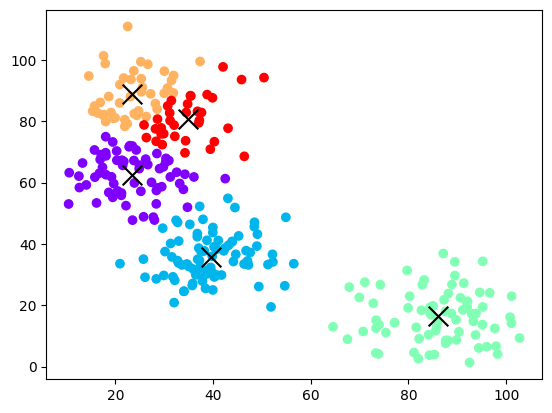

In [34]:
# test k-means with generated data
k = 5
epsilon = 0.001
clusters, centroids = kmeans(test_data, k, epsilon)

# plot the data points and the centroids
import matplotlib.pyplot as plt
plt.scatter(test_data[:, 0], test_data[:, 1], c=clusters, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black')
plt.show()

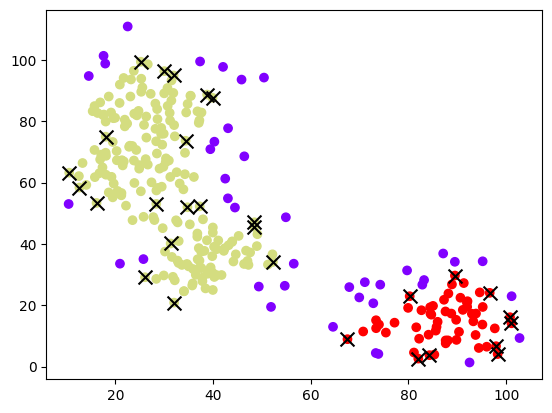

In [75]:
# test dbscan with generated data
minpts = 5
epsilon = 5
clusters, border_points = dbscan(test_data, minpts, epsilon)

# plot the data points and the clusters
plt.scatter(test_data[:, 0], test_data[:, 1], c=clusters, cmap='rainbow')
# mark border points with an X
plt.scatter(test_data[border_points == 1, 0], test_data[border_points == 1, 1], c='black', s=100, marker='x')
plt.show()

Extra credit

In [48]:
# calculate precision for clustering algorithms
def get_precision(true_labels, predicted_labels):
    # initialize the number of true positives
    true_positives = 0
    # loop through each cluster
    for i in np.unique(predicted_labels):
        # find the true label of the cluster
        true_label = np.argmax(np.bincount(true_labels[predicted_labels == i]))
        # count the number of true positives
        true_positives += np.sum(true_labels[predicted_labels == i] == true_label)
    # calculate the precision
    precision = true_positives / len(predicted_labels)
    return precision

In [50]:
# test the precision function

true_labels = np.array([0, 0, 1, 1, 2, 2])
predicted_labels = np.array([0, 2, 1, 1, 2, 1])
precision = get_precision(true_labels, predicted_labels)
print(precision)

0.6666666666666666
